<a href="https://colab.research.google.com/github/gulsahhu/gulsahhu/blob/main/GulsahUgur_Bootcamp_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Soru 1. Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal,ordinal,interval ve ratio olan kolonlar ekleyelim.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = {
    'nominal':["Kadın","Erkek","Kadın","Kadın","Kadın","Erkek"],
    'ordinal':["İlkokul","İlkokul","Lise","Üniversite","Lise","İlkokul"],
    'interval':["5","3","1","2","4","2"],
    'ratio':["21","29","25","22","22","26"]
}
indeksler =[1,2,3,4,5,6]


In [ ]:
data=pd.DataFrame(data=data,index=indeksler)

In [ ]:
# Veri setimiz; 20-30 yaş arasındaki kişilerin bir ürüne verdikleri puanın (1-5) eğitim düzeyiyle ilişkisi olup olmadığının araştırılması için oluşturuluyor.Gerçek bir veri seti değildir.
data

,nominal,ordinal,interval,ratio
1,Kadın,İlkokul,5,21
2,Erkek,İlkokul,3,29
3,Kadın,Lise,1,25
4,Kadın,Üniversite,2,22
5,Kadın,Lise,4,22
6,Erkek,İlkokul,2,26


In [ ]:
#Soru 2.Ekli data üzerindeki aşağıda yer alan kolonların count,mean,std, min,%25,%50,%75,max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp,bu değerleri sözel ve karşılaştırmaları olarak yorumlayalım.

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
 
from pydrive.drive import GoogleDrive
 
from google.colab import auth
 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
 
gauth = GoogleAuth()
 
gauth.credentials = GoogleCredentials.get_application_default()
 
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


- Veri setimiz 569 satırlık verilerden oluşmaktadır. Her bir değişken için mean(ortalama) satırına baktığımızda veriler farklı sınır aralıklarında yer aldığını görmekteyiz bu yüzden veri ön işleme aşamasında normalizasyon veya standardizasyon yaparak ölçeklendirebiliriz. Mean ve median(%50) karşılaştırılması yapıldığında radius_mean ve compactness_mean değişkenlerinde mean ve median birbiriyle aynı olmasa da yakın olduğunu gözlemlemekteyiz. Bu da aslında bize, bu iki değişkenin normal dağılıma yaklaştığını göstermekte.area_mean değişkeninde ise mean ve median arasındaki fark fazla olduğu için çarpık bir dağılım gösterdiğini söyleyebiliriz.

In [ ]:
#radius_mean değişkeni için outlier hesaplama
df_bening=df[df['diagnosis']=='B']
df_malignant=df[df['diagnosis']=='M']
desc=df_bening.radius_mean.describe()
Q1=desc[4]
Q3=desc[6]
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q1+1.5*IQR
print("Anything outside this range is an outlier:(",lower_bound,",", upper_bound,")")
df_bening[df_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",df_bening[(df_bening.radius_mean < lower_bound) | (df_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier:( 7.645000000000001 , 14.514999999999999 )
Outliers:  [14.64  14.62   6.981 15.1   15.71  14.95  16.84  14.97  14.97  15.27
 15.    14.96  14.61  14.76  16.5   15.19  16.17  16.14  14.99  14.69
 14.86  14.8   14.53  14.53  14.92  15.73  14.64  17.85  14.87  15.04
 16.3   14.81  14.58  14.74  14.59 ]


In [ ]:
#area_mean değişkeni için outlier hesaplama
df_bening=df[df['diagnosis']=='B']
df_malignant=df[df['diagnosis']=='M']
desc=df_bening.area_mean.describe()
Q1=desc[4]
Q3=desc[6]
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q1+1.5*IQR
print("Anything outside this range is an outlier:(",lower_bound,",", upper_bound,")")
df_bening[df_bening.area_mean < lower_bound].area_mean
print("Outliers: ",df_bening[(df_bening.area_mean < lower_bound) | (df_bening.area_mean > upper_bound)].area_mean.values)

Anything outside this range is an outlier:( 118.84999999999997 , 637.55 )
Outliers:  [651.9 662.7 640.7 674.5 761.7 689.5 640.1 880.2 690.2 685.9 725.5 641.2
 684.5 651.  687.3 664.9 641.2 668.7 838.1 711.8 788.5 800.  693.7 656.1
 673.7 674.8 659.7 644.2 646.1 686.9 747.2 666.  992.1 680.9 689.4 819.8
 680.7 658.8 656.4 668.6 657.1]


In [ ]:
#compactness_mean	 değişkeni için outlier hesaplama
df_bening=df[df['diagnosis']=='B']
df_malignant=df[df['diagnosis']=='M']
desc=df_bening.compactness_mean	.describe()
Q1=desc[4]
Q3=desc[6]
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q1+1.5*IQR
print("Anything outside this range is an outlier:(",lower_bound,",", upper_bound,")")
df_bening[df_bening.compactness_mean	 < lower_bound].compactness_mean	
print("Outliers: ",df_bening[(df_bening.compactness_mean	 < lower_bound) | (df_bening.compactness_mean	 > upper_bound)].compactness_mean	.values)

Anything outside this range is an outlier:( -0.00727499999999999 , 0.118515 )
Outliers:  [0.127  0.1413 0.1531 0.1535 0.1339 0.1209 0.2233 0.1303 0.1243 0.1807
 0.1296 0.1305 0.1599 0.1294 0.1483 0.1192 0.1325 0.1346 0.1289 0.1676
 0.1972 0.1206 0.1304 0.1438 0.166  0.1297 0.1836 0.1316 0.1223 0.1483
 0.1299 0.1511 0.1334 0.1364 0.2239 0.2204 0.1661 0.1225 0.1552 0.1199
 0.123  0.133 ]


In [ ]:
#Soru 3.Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını,kovaryanslarını,Pearson Correlation Coefficientlarını,Spearman Rank Coefficienlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumların.
#Kolonlar: radius_mean,area_mean,compactness_mean

In [ ]:
#Kovaryans
df = df.loc[:,['radius_mean','area_mean','compactness_mean']]
df.cov()

,radius_mean,area_mean,compactness_mean
radius_mean,12.418920,1224.483409,0.094197
area_mean,1224.483409,123843.554318,9.264931
compactness_mean,0.094197,9.264931,0.002789


- radius_mean,area_mean ve compactness_mean değişkenlerinin kovaryanslarını incelediğimizde radius_mean ile area_mean değişkenleri arasında aynı yönde bir ilişki olduğunu görüyoruz.radius_mean ile compactness_mean arasındaki ilişki tam 0 olmadığı için değişkenler arasında yine bir ilişki olduğunu söylenebilir.Bunun yanında area_mean ile compactness_mean arasında da bir ilişki olduğunu söylenebilir.

In [ ]:
#Korelasyon
df.corr()

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


- radius_mean,area_mean ve compactness_mean değişkenlerinin korelasyonlarını incelediğimizde radius_mean ile area_mean arasında çok kuvvetli bir doğrusal ilişkinin varlığından söz edebiliriz.radius_mean ile compactness_mean değişkenlerini incelediğimizde orta-kuvvetli doğrusal ilişkinin varlığından söz edebiliriz.area_mean ile compactness_mean arasındaki ilişki düşük kuvvetli bir doğrusal ilişkinin varlığından söz edebiliriz. Genel olarak baktığımızda compactness_mean değişkenimiz diğer değişkenlerimizle yüksek korelasyonlu bir ilişki içinde olmadığını görmekteyiz.

In [ ]:
#Pearson Korelasyon
df.corr(method='pearson')

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


In [ ]:
#Spearman Korelasyon
df.corr(method='spearman')

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.999602,0.497578
area_mean,0.999602,1.000000,0.488988
compactness_mean,0.497578,0.488988,1.000000


In [ ]:
!pip install researchpy


In [ ]:
#Effect Size
import researchpy

In [ ]:
researchpy.ttest(df['radius_mean'], df['area_mean'])

(      Variable       N        Mean  ...         SE   95% Conf.    Interval
 0  radius_mean   569.0   14.127292  ...   0.147736   13.837117   14.417467
 1    area_mean   569.0  654.889104  ...  14.753008  625.911994  683.866213
 2     combined  1138.0  334.508198  ...  12.026907  310.910773  358.105623
 
 [3 rows x 7 columns],                         Independent t-test    results
 0  Difference (radius_mean - area_mean) =   -640.7618
 1                    Degrees of freedom =   1136.0000
 2                                     t =    -43.4304
 3                 Two side test p value =      0.0000
 4                Difference < 0 p value =      0.0000
 5                Difference > 0 p value =      1.0000
 6                             Cohen's d =     -2.5749
 7                             Hedge's g =     -2.5732
 8                         Glass's delta =   -181.8255
 9                           Pearson's r =      0.7900)

- radius_mean ve area_mean arasında ki etki büyüklüğünü incelediğimizde Cohen's d değeri -2.5749 olduğunu görmekteyiz. Bu değer 0.2'den küçük olduğu için etki büyüklüğünün zayıf olduğunu söyleyebiliriz.Yani iki değişken grubu arasında zayıf düzeyde anlamlı bir fark vardır.

In [ ]:
researchpy.ttest(df['radius_mean'], df['compactness_mean'])

(           Variable       N       Mean  ...        SE  95% Conf.   Interval
 0       radius_mean   569.0  14.127292  ...  0.147736  13.837117  14.417467
 1  compactness_mean   569.0   0.104341  ...  0.002214   0.099992   0.108690
 2          combined  1138.0   7.115816  ...  0.220658   6.682873   7.548760
 
 [3 rows x 7 columns],
                                Independent t-test    results
 0  Difference (radius_mean - compactness_mean) =     14.0230
 1                           Degrees of freedom =   1136.0000
 2                                            t =     94.9084
 3                        Two side test p value =      0.0000
 4                       Difference < 0 p value =      1.0000
 5                       Difference > 0 p value =      0.0000
 6                                    Cohen's d =      5.6268
 7                                    Hedge's g =      5.6231
 8                                Glass's delta =      3.9792
 9                                  Pearson's r

- radius_mean ve compactness_mean arasında ki etki büyüklüğünü incelediğimizde Cohen's d değeri 5.6268 olduğunu görmekteyiz. Bu değer 0.8'den büyük olduğu için etki büyüklüğünün kuvvetli olduğunu söyleyebiliriz.Yani iki değişken grubu arasında kuvvetli düzeyde anlamlı bir fark vardır.

In [ ]:
researchpy.ttest(df['area_mean'], df['compactness_mean'])

(           Variable       N        Mean  ...         SE   95% Conf.    Interval
 0         area_mean   569.0  654.889104  ...  14.753008  625.911994  683.866213
 1  compactness_mean   569.0    0.104341  ...   0.002214    0.099992    0.108690
 2          combined  1138.0  327.496722  ...  12.191622  303.576119  351.417326
 
 [3 rows x 7 columns],
                              Independent t-test    results
 0  Difference (area_mean - compactness_mean) =    654.7848
 1                         Degrees of freedom =   1136.0000
 2                                          t =     44.3831
 3                      Two side test p value =      0.0000
 4                     Difference < 0 p value =      1.0000
 5                     Difference > 0 p value =      0.0000
 6                                  Cohen's d =      2.6313
 7                                  Hedge's g =      2.6296
 8                              Glass's delta =      1.8606
 9                                Pearson's r =    

-  area_mean ve compactness_mean arasında ki etki büyüklüğünü incelediğimizde Cohen's d değeri 2.6313 olduğunu görmekteyiz. Bu değer 0.8'den büyük olduğu için etki büyüklüğünün kuvvetli olduğunu söyleyebiliriz. Yani iki değişken grubu arasında kuvvetli düzeyde anlamlı bir fark vardır.

In [ ]:
# Soru 4.Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulunuz

**Bayes Teoremi**
-  Yakın ve yaygın olarak kullanılan bir uygulama, spam filtrelemesiydi. Bayes teoremi, bir e-posta mesajının spam olup olmadığının tahmin etmesine yardımcı olur.

- İkinci Dünya Savaşı sırasında, İngiliz kod yazarı Alan Turing, “kırılmaz” Enigma kodunun çatlamasına yardımcı olmak için Bayes teorisine dayanan bir sistem geliştirdi.Bir mesajdaki bir dizi harfin tahmin edilmesi için sistemi kullanmış, bu da olasılıkların hesaplanmasına ve yeni mesajların geldiği varsayımlarının gözden geçirilmesine yol açmıştır.

- Hava durumu tahminlerinde Bayes Teoremi kullanılır. Havanın yağmurlu veya bulutlu bulutlu olup olmadığına dair tahminler bu teorem ile yapılabilir.

- Tek gen hastalıklarında taşıyıcılık risklerinin hesaplanmasında da Bayes teoremi kullanılır. Bayes teoremi,genetik hastalıkların tekrarlama risklerinin hesaplanmasında en yakın olasılığı bulmak için doğru bilgilerin hızlı kombinasyonunun sağlanmasında yardımcı olur.

- Şifre kontrolü uygulamaları, konuşmacı tanıma sistemleri.


In [ ]:
# Soru 5.Poisson,Normal,Gamma,Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.

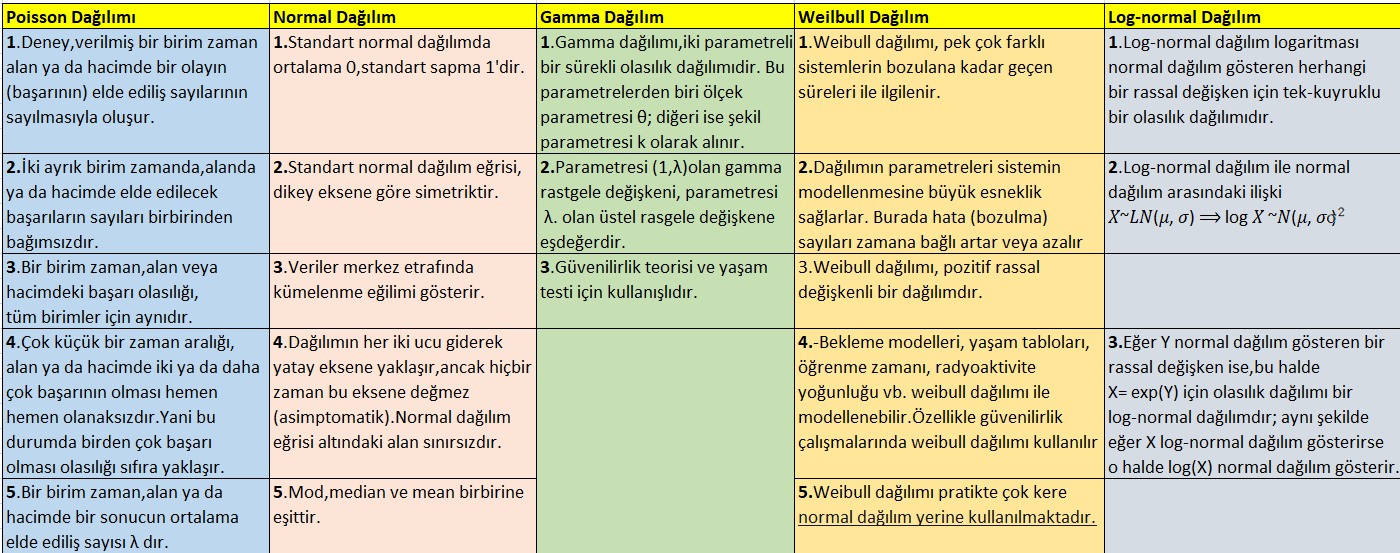